<a href="https://colab.research.google.com/github/Parthsarthi-lab/Machine-Learning-Projects/blob/main/Air_passengers_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import  ARIMA
import math
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

import warnings
warnings.filterwarnings("ignore")


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/PYTHON/Demo_Datasets.zip (Unzipped Files)/Demo Datasets/Lesson 8/AirPassengers.csv")
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

In [ ]:
# Converting the dtype of Month column into a datetime object
data["Month"] = data["Month"].apply(lambda x: dt(int(x[:4]),int(x[5:]),15))
data = data.set_index("Month")
data.head()

,#Passengers
Month,
1949-01-15,112
1949-02-15,118
1949-03-15,132
1949-04-15,129
1949-05-15,121


In [ ]:
data.dtypes

#Passengers    int64
dtype: object

In [ ]:
# Storing the passengerse column
ts = data["#Passengers"]

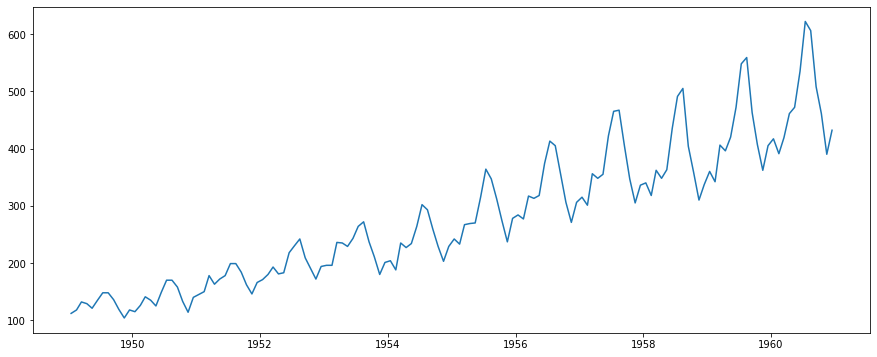

In [ ]:
plt.plot(ts)

In [ ]:
ts_log = np.log(ts)

In [ ]:
sum(np.unique(ts,return_counts=True)[1])

144

In [ ]:
def test_stationarity(timeseries):
  rolmean = timeseries.rolling(window=52,center=False).mean()
  rolstd = timeseries.rolling(window=52,center=False).std()

  org = plt.plot(timeseries,color="blue",label='Orignal')
  mean = plt.plot(rolmean,color="red",label="Rolling Mean")
  std = plt.plot(rolstd,color="black",label="Rolling STD")
  plt.legend(loc="best")
  plt.title("Rolling means and Standard deviation")
  plt.show(block=False)


  print("DICKY-FULLER TEST :")
  dftest = adfuller(timeseries,autolag="AIC")
  dfoutput = pd.Series(dftest[0:4],index=["Test Statistic","p-values","#Lags Used","No. of observations used"])

  for key,value in dftest[4].items():
    dfoutput["Critical Value(%s)"%key] = value
  print(dfoutput)

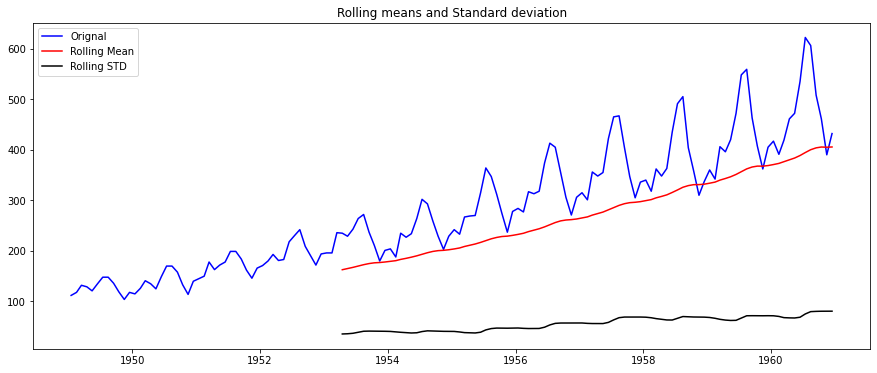

DICKY-FULLER TEST :
Test Statistic                0.815369
p-values                      0.991880
#Lags Used                   13.000000
No. of observations used    130.000000
Critical Value(1%)           -3.481682
Critical Value(5%)           -2.884042
Critical Value(10%)          -2.578770
dtype: float64


In [ ]:
test_stationarity(data['#Passengers'])

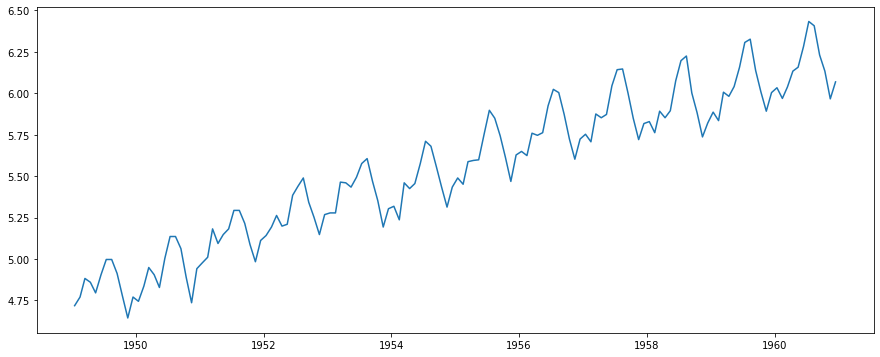

In [ ]:
plt.plot(ts_log)

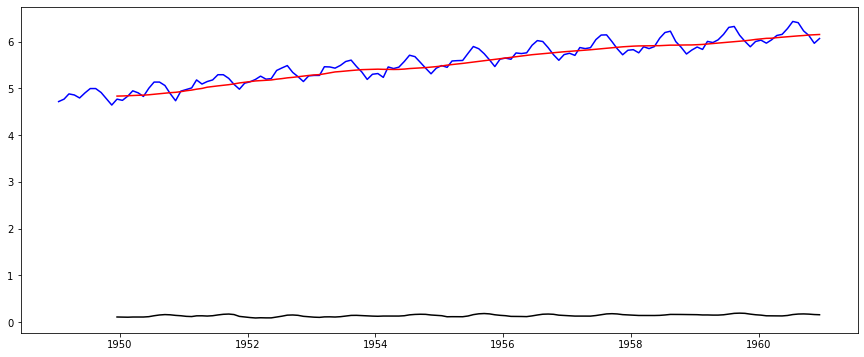

In [ ]:
movingAverage = ts_log.rolling(window=12).mean()
movingSTD = ts_log.rolling(window=12).std()

plt.plot(ts_log,color="blue",label="Original")
plt.plot(movingAverage,color="red",label="Rolling Mean")
plt.plot(movingSTD,color="black",label="Rolling STD")

In [ ]:
movingAverage.head(20)


Month
1949-01-15         NaN
1949-02-15         NaN
1949-03-15         NaN
1949-04-15         NaN
1949-05-15         NaN
1949-06-15         NaN
1949-07-15         NaN
1949-08-15         NaN
1949-09-15         NaN
1949-10-15         NaN
1949-11-15         NaN
1949-12-15    4.836178
1950-01-15    4.838381
1950-02-15    4.843848
1950-03-15    4.849344
1950-04-15    4.853133
1950-05-15    4.855843
1950-06-15    4.864066
1950-07-15    4.875614
1950-08-15    4.887163
Name: #Passengers, dtype: float64

In [ ]:
ts_log.head(20)

Month
1949-01-15    4.718499
1949-02-15    4.770685
1949-03-15    4.882802
1949-04-15    4.859812
1949-05-15    4.795791
1949-06-15    4.905275
1949-07-15    4.997212
1949-08-15    4.997212
1949-09-15    4.912655
1949-10-15    4.779123
1949-11-15    4.644391
1949-12-15    4.770685
1950-01-15    4.744932
1950-02-15    4.836282
1950-03-15    4.948760
1950-04-15    4.905275
1950-05-15    4.828314
1950-06-15    5.003946
1950-07-15    5.135798
1950-08-15    5.135798
Name: #Passengers, dtype: float64

In [ ]:
ts_log_mv_diff = ts_log - movingAverage  # Differencing to remove non-stationary
ts_log_mv_diff.dropna(inplace=True)
ts_log_mv_diff.head(12)

Month
1949-12-15   -0.065494
1950-01-15   -0.093449
1950-02-15   -0.007566
1950-03-15    0.099416
1950-04-15    0.052142
1950-05-15   -0.027529
1950-06-15    0.139881
1950-07-15    0.260184
1950-08-15    0.248635
1950-09-15    0.162937
1950-10-15   -0.018578
1950-11-15   -0.180379
Name: #Passengers, dtype: float64

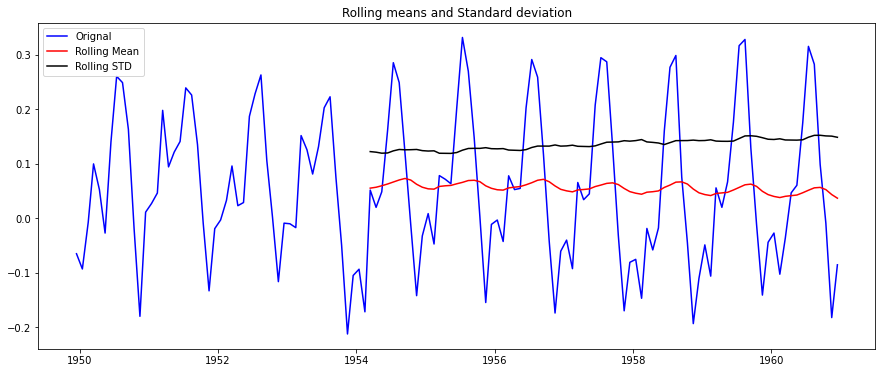

DICKY-FULLER TEST :
Test Statistic               -3.162908
p-values                      0.022235
#Lags Used                   13.000000
No. of observations used    119.000000
Critical Value(1%)           -3.486535
Critical Value(5%)           -2.886151
Critical Value(10%)          -2.579896
dtype: float64


In [ ]:
# Checking for stationerity
test_stationarity(ts_log_mv_diff)

Since the test statistic is smaller than the critical value at 1% significance level .<br>
Therefore we can reject the null hypotheses and accept H1 - TIME Series is stationary

## ***BUILDING ARIMA MODEL***

**THE ACF PLOT GIVES THE ORDER OF THE MA MODEL(q)**<br>
**THE PACF PLOT GIVES THE ORDER OF THE AR MODEL(p**)<br>

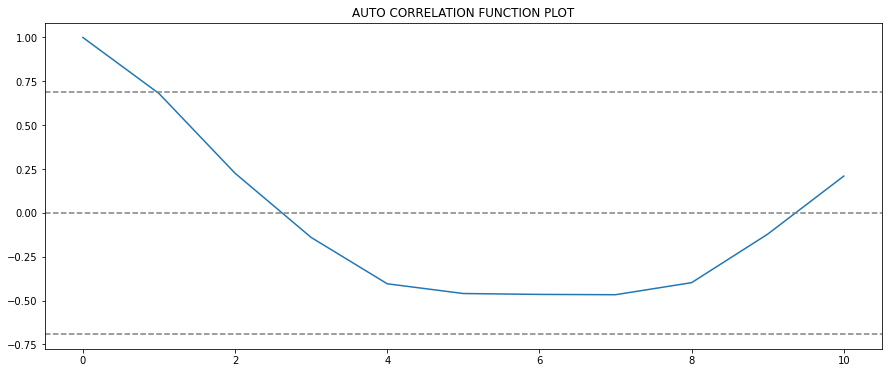

In [ ]:
plt.plot(np.arange(0,11),acf(ts_log_mv_diff,nlags=10))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color="gray")
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color="gray")
plt.title("AUTO CORRELATION FUNCTION PLOT")
plt.show()

The ACF curve crosses the upper confidence value when the lagged value is between 0 or 1 . <br>
Thus the optimal value of q(order of MA model) should be 0 or 1

In [ ]:
pacf(ts_log_mv_diff,nlags=10)

array([ 1.00000000e+00,  6.85816481e-01, -4.54621496e-01, -1.43654991e-01,
       -2.75125653e-01,  9.32285869e-04, -3.85617122e-01, -3.36181158e-01,
       -3.87065177e-01,  1.54581001e-01, -1.58153656e-01])

In [ ]:
np.arange(0,11)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

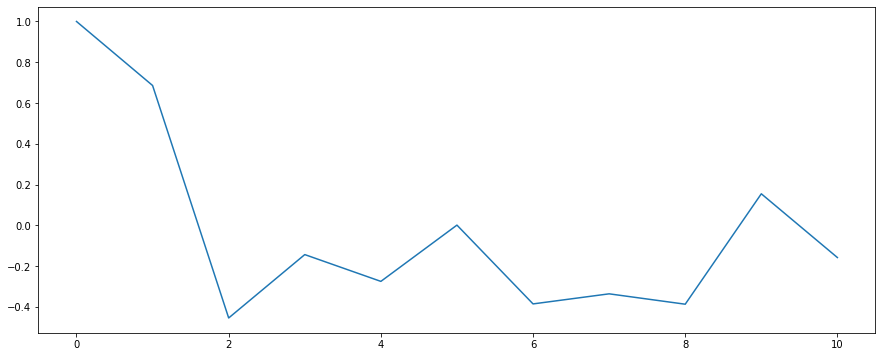

In [ ]:
plt.plot(np.arange(0,11),pacf(ts_log_mv_diff,nlags=10))


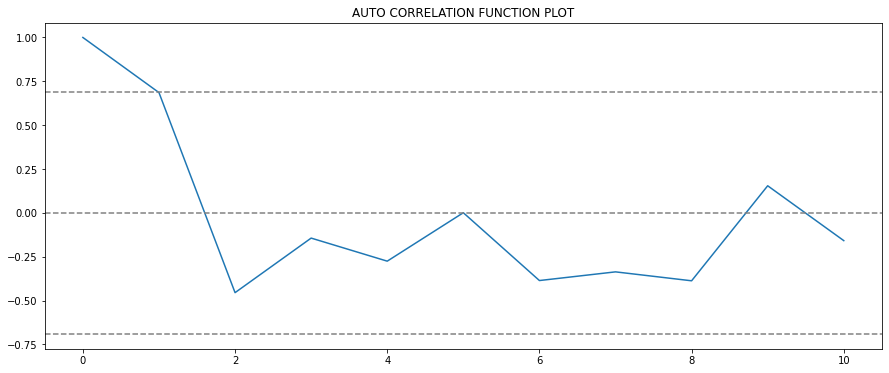

In [ ]:
plt.plot(np.arange(0,11),pacf(ts_log_mv_diff,nlags=10))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color="gray")
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color="gray")
plt.title("AUTO CORRELATION FUNCTION PLOT")
plt.show()

THE PACF PLOT DROPS TO ZERO BETWEEN LAGS 1 AND 2 <BR>
THUS THE VALUE OF P IN THE ARIMA MODEL SHOULD BE 1 OR 2

Text(0.5, 1.0, 'RSS:  nan')

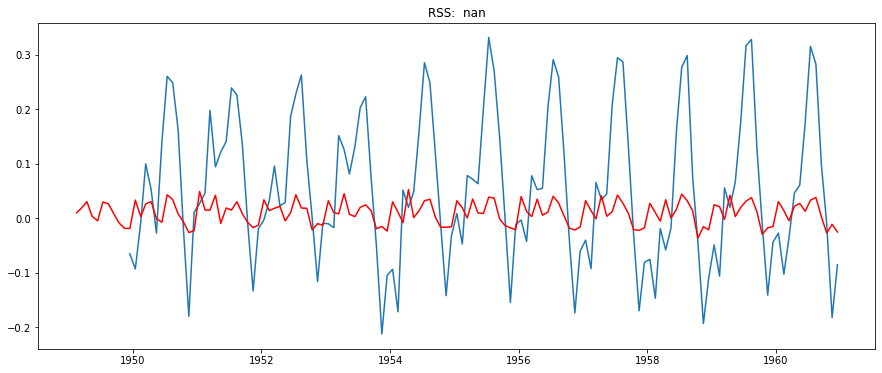

In [ ]:
model = ARIMA(ts_log,order=(1,1,0))  # order = (p,d,q)
results_ARIMA = model.fit(disp=-1)
plt.plot(ts_log_mv_diff)
plt.plot(results_ARIMA.fittedvalues,color="red")
plt.title("RSS: % 4f"%sum((results_ARIMA.fittedvalues[1:]-ts_log_mv_diff)**2))

In [ ]:
ts_log_mv_diff

Month
1949-12-15   -0.065494
1950-01-15   -0.093449
1950-02-15   -0.007566
1950-03-15    0.099416
1950-04-15    0.052142
                ...   
1960-08-15    0.282363
1960-09-15    0.098235
1960-10-15   -0.009230
1960-11-15   -0.182690
1960-12-15   -0.085789
Name: #Passengers, Length: 133, dtype: float64

In [ ]:
results_ARIMA.fittedvalues

Month
1949-02-15    0.009676
1949-03-15    0.018164
1949-04-15    0.030130
1949-05-15    0.003154
1949-06-15   -0.005039
                ...   
1960-08-15    0.037828
1960-09-15    0.002541
1960-10-15   -0.027477
1960-11-15   -0.011640
1960-12-15   -0.025650
Length: 143, dtype: float64

The way to converting differencing to log scale is to add these differences
consecutively to the base number . <br>
   An easier way to do it is to first determine the cumalative sum at index and then add it to the base number .

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
predictions_ARIMA_diff.head(10)

Month
1949-02-15    0.009676
1949-03-15    0.018164
1949-04-15    0.030130
1949-05-15    0.003154
1949-06-15   -0.005039
1949-07-15    0.029604
1949-08-15    0.026101
1949-09-15    0.007744
1949-10-15   -0.009139
1949-11-15   -0.018918
dtype: float64

In [ ]:
print("No. of values in predicted time series is ",predictions_ARIMA_diff.shape[0]," due to lag=1")
print("Actual no. of values in time series data is ",ts_log.shape[0])

No. of values in predicted time series is  143  due to lag=1
Actual no. of values in time series data is  144


In [ ]:
predictions_ARIMA_diff_cumsum =  predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Month
1949-02-15    0.009676
1949-03-15    0.027839
1949-04-15    0.057969
1949-05-15    0.061123
1949-06-15    0.056084
dtype: float64

In [ ]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0],index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-15    4.718499
1949-02-15    4.728175
1949-03-15    4.746338
1949-04-15    4.776468
1949-05-15    4.779622
dtype: float64

Text(0.5, 1.0, 'RMSE :52.1841')

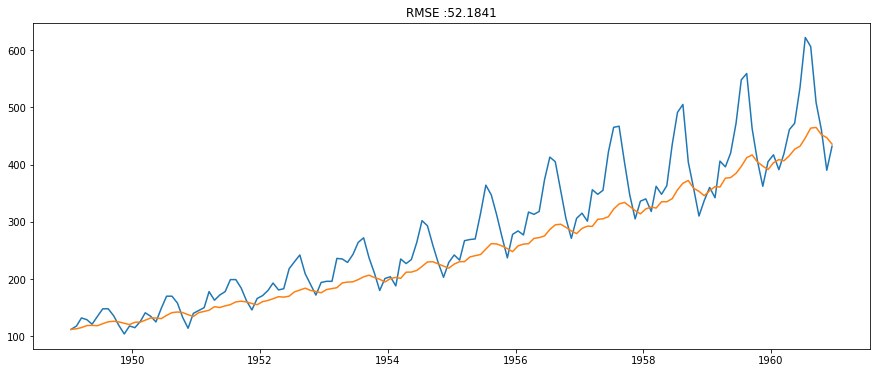

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)  # CONVERTING FROM LOG SCALE TO ORIGNAL TIME SERIES SCALE
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title("RMSE :%.4f"%np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

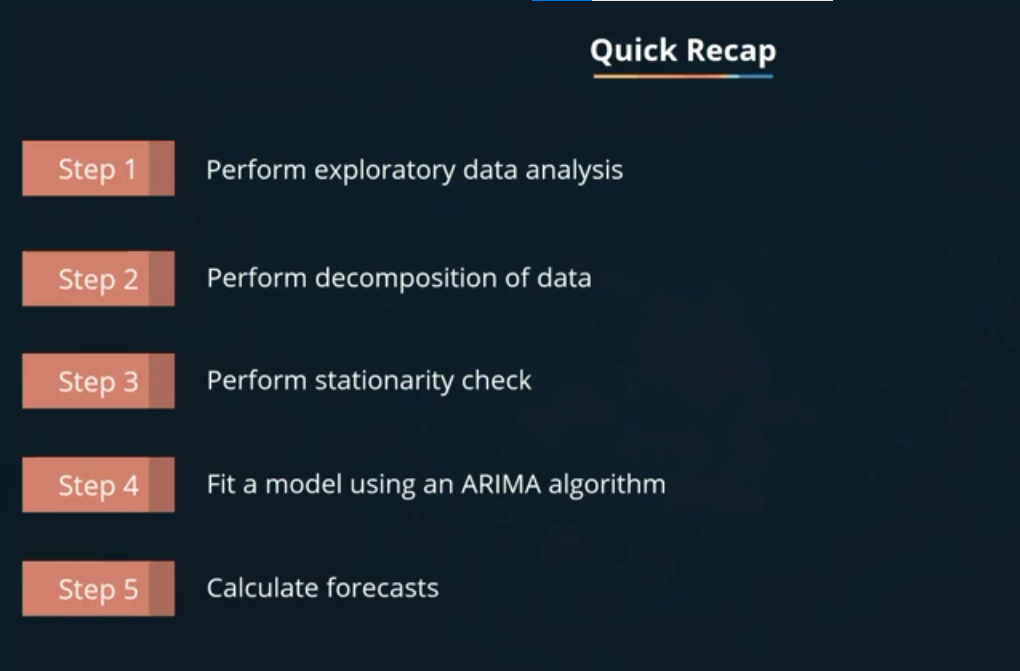

In [ ]:
predictions_ARIMA_log


Month
1949-01-15    4.718499
1949-02-15    4.728175
1949-03-15    4.746338
1949-04-15    4.776468
1949-05-15    4.779622
                ...   
1960-08-15    6.139140
1960-09-15    6.141680
1960-10-15    6.114203
1960-11-15    6.102563
1960-12-15    6.076913
Length: 144, dtype: float64

In [ ]:
predictions_ARIMA  # ORIGNAL TIME SERIES SCAL

Month
1949-01-15    112.000000
1949-02-15    113.088945
1949-03-15    115.161806
1949-04-15    118.684402
1949-05-15    119.059282
                 ...    
1960-08-15    463.654486
1960-09-15    464.833925
1960-10-15    452.235670
1960-11-15    447.002030
1960-12-15    435.682063
Length: 144, dtype: float64